In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from math import sqrt

def evaluate_model(model, predict_set, evaluate_set):
    predictions = model.predict(predict_set)
    #correlation_matrix = np.corrcoef(predict_set,evaluate_set)
    #correlation_xy = correlation_matrix[0,1]
    #r_squared = r2_score(predict_set,evaluate_set)
    print("Median Absolute Error: " + str(round(median_absolute_error(predictions, evaluate_set), 2))) 
    RMSE = round(sqrt(mean_squared_error(predictions, evaluate_set)), 2)
    print("RMSE: " + str(RMSE))
    #print("R Squared: " + str(r_squared))

In [2]:
airbnb_df = pd.read_csv(r"C:\Users\darre\OneDrive\Documents\Capstone One Clean\Airbnb_NYC_Original.csv")
airbnb_df.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
0,1,188,11,0,2,7,225.0,1,1,0,2,365,13
1,17,48,11,1,2,1,89.0,19,3,0,1,137,9
2,1,188,11,1,2,3,200.0,1,2,0,2,0,13
3,1,188,11,1,2,2,79.0,1,2,2,2,216,13
4,1,188,11,1,2,2,79.0,1,1,2,2,0,16


In [3]:
#shuffle rows and create training and testing sets
airbnb_df_shuffled = shuffle(airbnb_df)

airbnb_df_shuffled.head(5)

,beds,city,market,bedrooms,bathrooms,minimum_nights,price,property_type,accommodates,room_type,neighbourhood_group_cleansed,availability_365,latitude_longitude_bin
45014,17,48,11,9,5,45,184.0,1,8,0,1,256,9
41189,1,48,11,1,2,6,85.0,1,2,2,1,0,13
44665,1,48,11,1,2,7,44.0,1,1,3,1,53,9
28712,1,225,11,0,2,3,96.0,1,2,0,3,0,13
25813,1,188,11,1,2,5,150.0,1,2,0,2,0,13


In [4]:
y = airbnb_df_shuffled['price']
X = airbnb_df_shuffled.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)

In [5]:
model = RandomForestClassifier(n_estimators = 50, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [6]:
model.score(X_test, y_test)

0.0737655438850658

In [7]:
evaluate_model(model, X_test, y_test)

Median Absolute Error: 28.0
RMSE: 105.14


In [8]:
evaluate_model(model, X_train, y_train)

Median Absolute Error: 0.0
RMSE: 42.74


In [9]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.27621664509670696

In [10]:
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(n_estimators = 100, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob

In [11]:
evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 26.25
RMSE: 86.83


In [12]:
evaluate_model(my_pipeline_RF, X_train, y_train)

Median Absolute Error: 13.03
RMSE: 44.45


In [13]:
y_pred = my_pipeline_RF.predict(X_test)
r2_score(y_test,y_pred)

0.5063856055068199

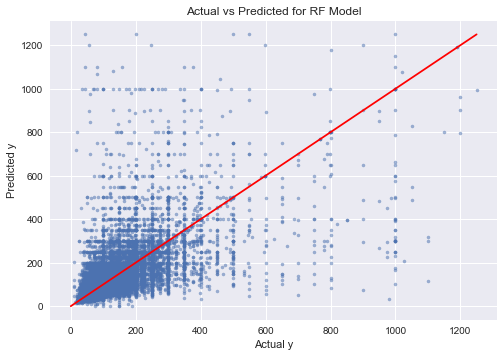

In [14]:
from matplotlib import rcParams
y_pred = model.predict(X_test)

# Build a plot
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_pred, y_test,alpha = .5, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Model')

# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

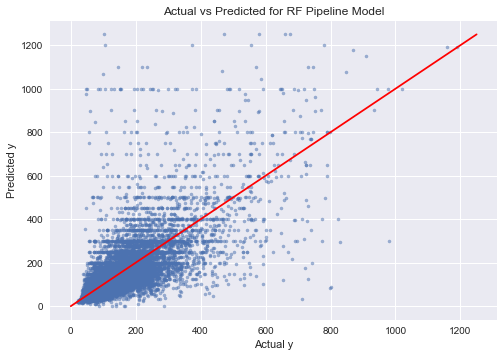

In [15]:
y_pred = my_pipeline_RF.predict(X_test)

# Build a plot
rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_pred, y_test,alpha = .5, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')


# Now add the perfect prediction line
diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [16]:
importances = my_pipeline_RF.steps[2][1].feature_importances_
feature_importances = pd.DataFrame({"feature":X.columns.values, "importance":importances})
feature_importances.sort_values("importance", ascending=False).head(22)

,feature,importance
8,room_type,0.233857
4,bathrooms,0.164812
10,availability_365,0.149369
5,minimum_nights,0.082242
7,accommodates,0.081421
11,latitude_longitude_bin,0.080945
6,property_type,0.053434
1,city,0.045551
3,bedrooms,0.042309
0,beds,0.040627


In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('price ~ accommodates + bathrooms + bedrooms', airbnb_df_shuffled).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     6392.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:55:15   Log-Likelihood:            -3.0502e+05
No. Observations:               50200   AIC:                         6.100e+05
Df Residuals:                   50196   BIC:                         6.101e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.4161      1.248     19.562   

In [24]:
#Hyperparamter tuning
z = [('imputer', SimpleImputer())]
z = [('scaler', StandardScaler())]
z = [('rf', RandomForestRegressor(random_state = 42))]
param_grid = {    
             'rf__max_depth': np.arange(12, 100),
             'rf__n_estimators': [50,100,1000]}

tuned_pipeline = Pipeline(z)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
X_train = preprocessing.scale(X_train) 
tuned_pipeline_cv = GridSearchCV(tuned_pipeline, param_grid, cv=3, n_jobs = -1, verbose = 2)
tuned_pipeline_cv.fit(X_train, y_train)
tuned_pipeline_cv.best_params_

Fitting 3 folds for each of 264 candidates, totalling 792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-1)]: Done 792 out of 792 | elapsed: 27.6min finished


{'rf__max_depth': 13, 'rf__n_estimators': 1000}

In [18]:
y = airbnb_df_shuffled['price']
X = airbnb_df_shuffled.drop('price', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .33,random_state = 42)
model = RandomForestClassifier(max_depth = 13,n_estimators = 1000, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
evaluate_model(model, X_test, y_test)

Median Absolute Error: 25.0
RMSE: 95.32


In [20]:
evaluate_model(model, X_train, y_train)

Median Absolute Error: 10.0
RMSE: 63.34


In [21]:
y_pred = model.predict(X_test)
r2_score(y_test,y_pred)

0.40509928848192756

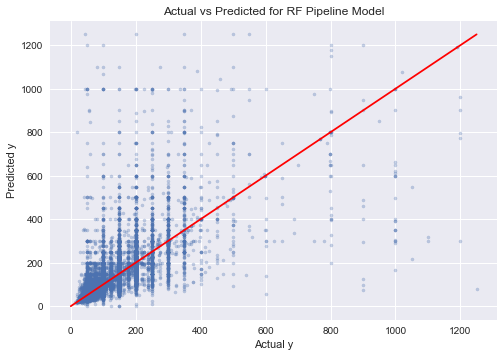

In [22]:
y_pred = model.predict(X_test)

rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_pred, y_test,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()

In [23]:
my_pipeline_RF = make_pipeline(SimpleImputer(), StandardScaler(),
                               RandomForestRegressor(max_depth = 13, n_estimators = 1000, random_state=42))

my_pipeline_RF.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=13, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_

In [24]:
evaluate_model(my_pipeline_RF, X_test, y_test)

Median Absolute Error: 25.54
RMSE: 83.79


In [25]:
evaluate_model(my_pipeline_RF, X_train, y_train)

Median Absolute Error: 22.54
RMSE: 63.13


In [26]:
y_pred = my_pipeline_RF.predict(X_test)
r2_score(y_test,y_pred)

0.5402890058881806

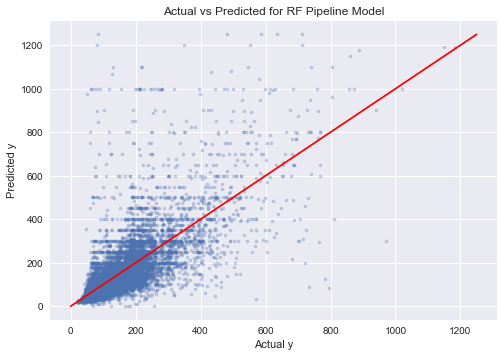

In [27]:
y_pred = my_pipeline_RF.predict(X_test)

rcParams['figure.figsize'] = 12,10
plt.style.use('seaborn')
plt.scatter(y_pred, y_test,alpha = .3, s = 10)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted for RF Pipeline Model')

diagonal = np.linspace(0, np.max(y_test), 100)
plt.plot(diagonal, diagonal, '-r')
plt.show()